In [237]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [238]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [239]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [240]:
df['Date'] = pd.to_datetime(df['date'])

In [241]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [242]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [243]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [244]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [245]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [246]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [247]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [248]:
Ban_Coo1= df[(df['city'] == 'Bangalore') & (df['product'] == 'coolers')]

In [249]:
Ban_Coo1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,coolers,11-01-2017,Bangalore,51152
2017-12-01,coolers,12-01-2017,Bangalore,47221
2018-01-01,coolers,01-01-2018,Bangalore,1000729
2018-02-01,coolers,02-01-2018,Bangalore,5473220
2018-03-01,coolers,03-01-2018,Bangalore,8167119


In [250]:
Ban_Coo1.shape

(48, 4)

In [251]:
Ban_Coo= Ban_Coo1.drop('date', axis = 1)

In [252]:
Ban_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Bangalore,5202792
2014-05-01,coolers,Bangalore,1641231
2014-06-01,coolers,Bangalore,47700
2014-07-01,coolers,Bangalore,0
2014-08-01,coolers,Bangalore,0


In [253]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

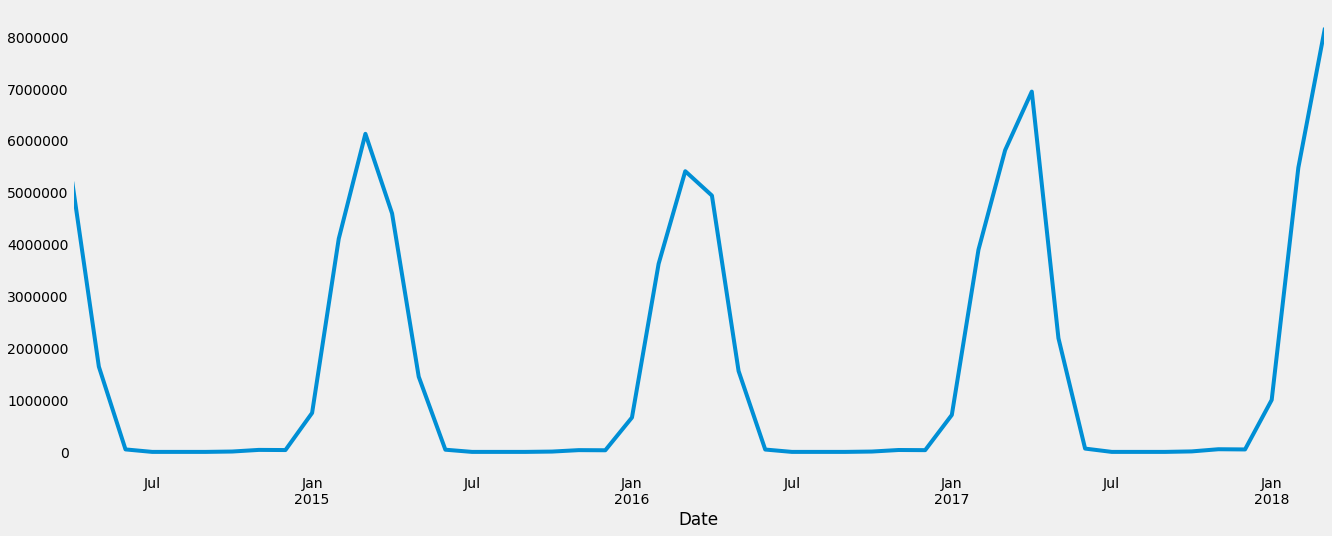

In [254]:
Ban_Coo['sales'].plot()
plt.grid();

In [255]:
Ban_Coo.sort_index(inplace= True)

In [256]:
Ban_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Bangalore,5202792
2014-05-01,coolers,Bangalore,1641231
2014-06-01,coolers,Bangalore,47700
2014-07-01,coolers,Bangalore,0
2014-08-01,coolers,Bangalore,0


In [257]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

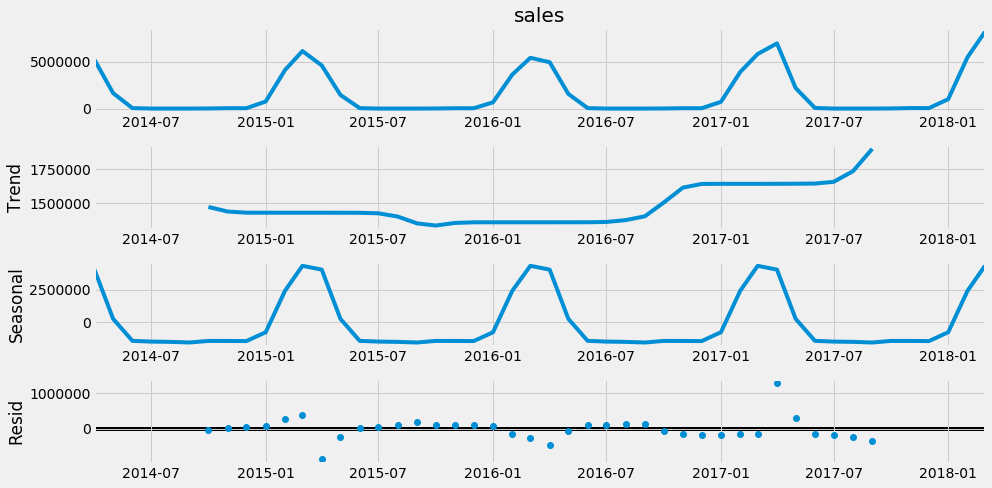

In [258]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Ban_Coo['sales'],model='additive')
decomposition.plot();

In [259]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.470518e+06
2014-11-01    1.437001e+06
2014-12-01    1.428730e+06
2015-01-01    1.428497e+06
2015-02-01    1.428497e+06
2015-03-01    1.428497e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    4.017455e+06
2014-05-01    2.602463e+05
2014-06-01   -1.421070e+06
2014-07-01   -1.475027e+06
2014-08-01   -1.497515e+06
2014-09-01   -1.544895e+06
2014-10-01   -1.424392e+06
2014-11-01   -1.426559e+06
2014-12-01   -1.437164e+06
2015-01-01   -7.625973e+05
2015-02-01    2.402537e+06
2015-03-01    4.308981e+06
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    -39063.410880
2014-11-01     27916.478009
2014-12-01     43

In [260]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.470518e+06
2014-11-01    1.437001e+06
2014-12-01    1.428730e+06
2015-01-01    1.428497e+06
2015-02-01    1.428497e+06
2015-03-01    1.428497e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    4.017455e+06
2014-05-01    2.602463e+05
2014-06-01   -1.421070e+06
2014-07-01   -1.475027e+06
2014-08-01   -1.497515e+06
2014-09-01   -1.544895e+06
2014-10-01   -1.424392e+06
2014-11-01   -1.426559e+06
2014-12-01   -1.437164e+06
2015-01-01   -7.625973e+05
2015-02-01    2.402537e+06
2015-03-01    4.308981e+06
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    -39063.410880
2014-11-01     27916.478009
2014-12-01     43

In [261]:
Ban_Coo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [262]:
train    =   Ban_Coo[0:int(len(Ban_Coo)*0.7)] 
test     =  Ban_Coo[int(len(Ban_Coo)*0.7):]

In [263]:
train.shape

(33, 3)

In [264]:
test.shape

(15, 3)

In [265]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,coolers,Bangalore,5202792
2014-05-01,coolers,Bangalore,1641231
2014-06-01,coolers,Bangalore,47700
2014-07-01,coolers,Bangalore,0
2014-08-01,coolers,Bangalore,0


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,coolers,Bangalore,0
2016-09-01,coolers,Bangalore,0
2016-10-01,coolers,Bangalore,6700
2016-11-01,coolers,Bangalore,36389
2016-12-01,coolers,Bangalore,33593


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,coolers,Bangalore,711915
2017-02-01,coolers,Bangalore,3893629
2017-03-01,coolers,Bangalore,5810059
2017-04-01,coolers,Bangalore,6937942
2017-05-01,coolers,Bangalore,2188587


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,coolers,Bangalore,51152
2017-12-01,coolers,Bangalore,47221
2018-01-01,coolers,Bangalore,1000729
2018-02-01,coolers,Bangalore,5473220
2018-03-01,coolers,Bangalore,8167119


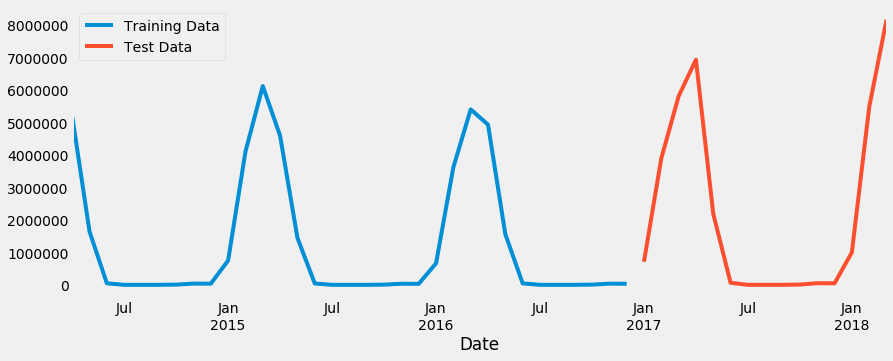

In [266]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [267]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [268]:
from sklearn import metrics

Simpleaverage

In [269]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [270]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,coolers,Bangalore,711915,1.224500e+06
2017-02-01,coolers,Bangalore,3893629,1.224500e+06
2017-03-01,coolers,Bangalore,5810059,1.224500e+06
2017-04-01,coolers,Bangalore,6937942,1.224500e+06
2017-05-01,coolers,Bangalore,2188587,1.224500e+06


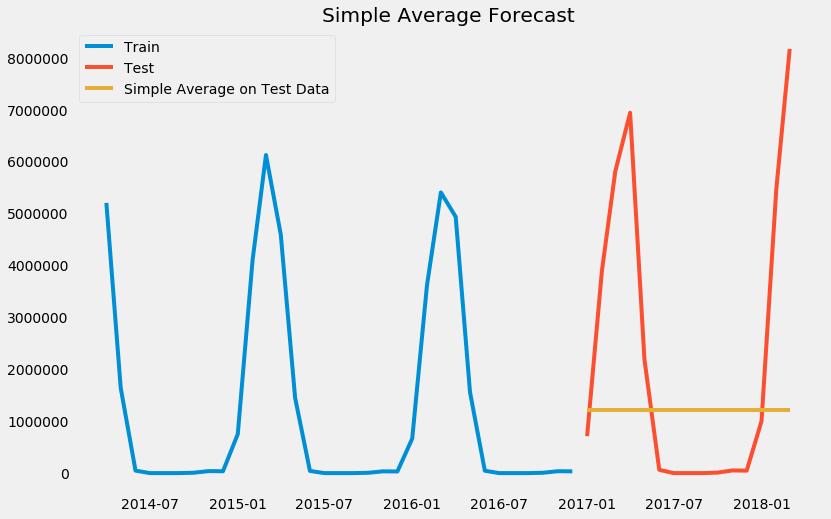

In [271]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [272]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 3037256.449


In [273]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,3.037256e+06


In [274]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [275]:
SES_train = train.copy()
SES_test = test.copy()

In [276]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [277]:
model_SES_autofit = model_SES.fit(optimized=True)

In [278]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 5202792.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [279]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,coolers,Bangalore,711915,33606.236938
2017-02-01,coolers,Bangalore,3893629,33606.236938
2017-03-01,coolers,Bangalore,5810059,33606.236938
2017-04-01,coolers,Bangalore,6937942,33606.236938
2017-05-01,coolers,Bangalore,2188587,33606.236938


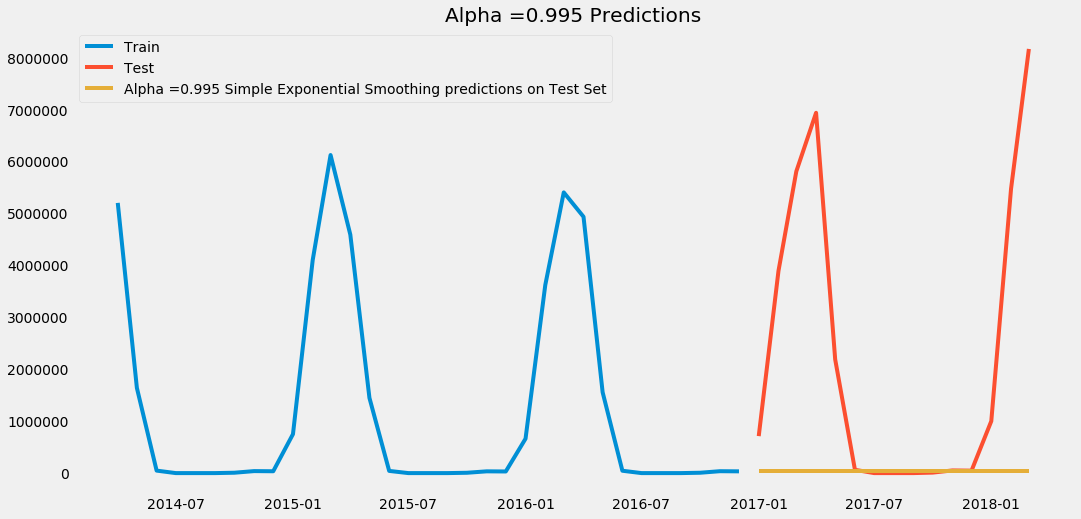

In [280]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [281]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 3630658.344


In [282]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [283]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: inf


In [284]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf


In [285]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [286]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [287]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,2.542343e+06,3.110571e+06
1,0.2,2.289125e+06,3.350353e+06
2,0.3,2.148003e+06,3.501619e+06
3,0.4,2.024254e+06,3.585920e+06
4,0.5,1.910351e+06,3.620475e+06
5,0.6,1.806471e+06,3.630283e+06
8,0.9,1.545744e+06,3.630681e+06
7,0.8,1.625384e+06,3.631071e+06
6,0.7,1.711920e+06,3.631559e+06


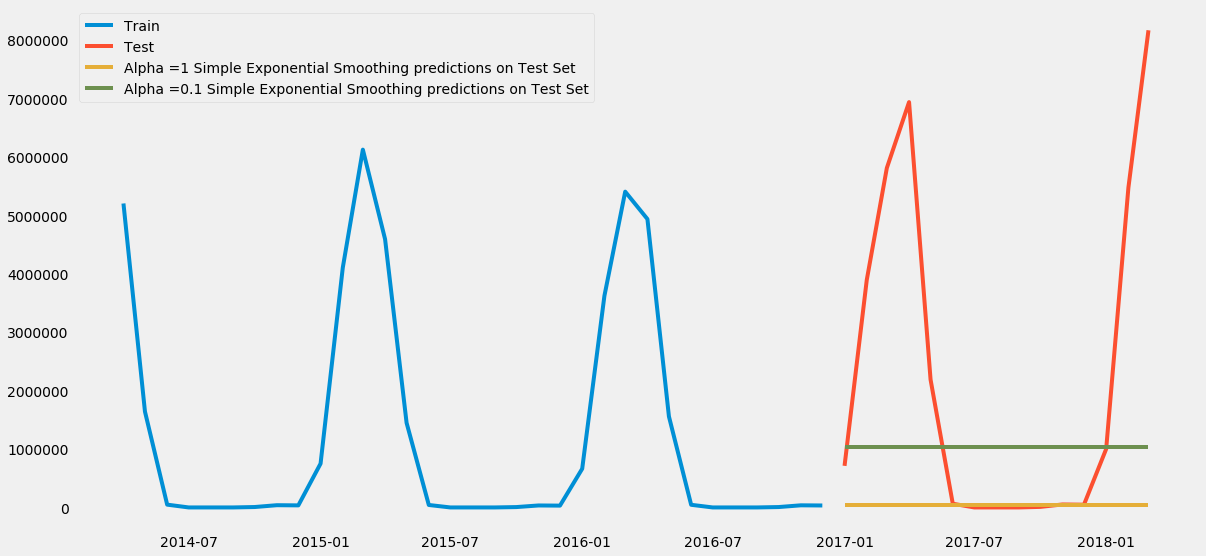

In [288]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [289]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1])
print('\nMAPE:',mape)


MAPE: inf


In [290]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf


Double

In [291]:
DES_train = train.copy()
DES_test = test.copy()

In [292]:
model_DES = Holt(DES_train['sales'])

In [293]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [294]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [295]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1.384405e+07,3.455929e+06
1,0.1,0.2,9.901589e+06,6.527931e+06
2,0.1,0.3,8.310210e+06,4.353453e+06
3,0.1,0.4,7.225689e+06,1.008686e+07
4,0.1,0.5,6.502370e+06,1.091812e+07
...,...,...,...,...
95,1.0,0.6,1.637319e+06,3.635336e+06
96,1.0,0.7,1.631035e+06,3.613880e+06
97,1.0,0.8,1.626604e+06,3.617601e+06
98,1.0,0.9,1.624779e+06,3.629590e+06


In [296]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
8,0.1,0.9,5.479897e+06,2.909295e+06
49,0.5,1.0,2.337054e+06,2.970069e+06
56,0.6,0.7,2.130734e+06,3.025870e+06
7,0.1,0.8,5.592768e+06,3.038947e+06
45,0.5,0.6,2.314472e+06,3.054643e+06


In [297]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.6,0.9])
print('\nMAPE:',mape)


MAPE: inf


In [298]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf


In [299]:
TES_train = train.copy()
TES_test = test.copy()

In [300]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='additive',initialization_method='estimated')

In [301]:
model_TES_autofit = model_TES.fit()

In [139]:
model_TES_autofit.params

{'smoothing_level': 0.005,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.2842857142857143,
 'damping_trend': nan,
 'initial_level': 1449195.2083333326,
 'initial_trend': -2938.212121212011,
 'initial_seasons': array([ 3157740.28125   ,    14995.73958333, -1390884.96875   ,
        -1429129.46875   , -1405354.67708333, -1355262.21875   ,
        -1468554.96875   , -1403741.88541667, -1398418.92708333,
         -683145.30208333,  2670794.69791667,  4690961.69791667]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [140]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,coolers,Bangalore,711915,6.580922e+05
2017-02-01,coolers,Bangalore,3893629,3.898519e+06
2017-03-01,coolers,Bangalore,5810059,5.850291e+06
2017-04-01,coolers,Bangalore,6937942,4.706207e+06
2017-05-01,coolers,Bangalore,2188587,1.433603e+06


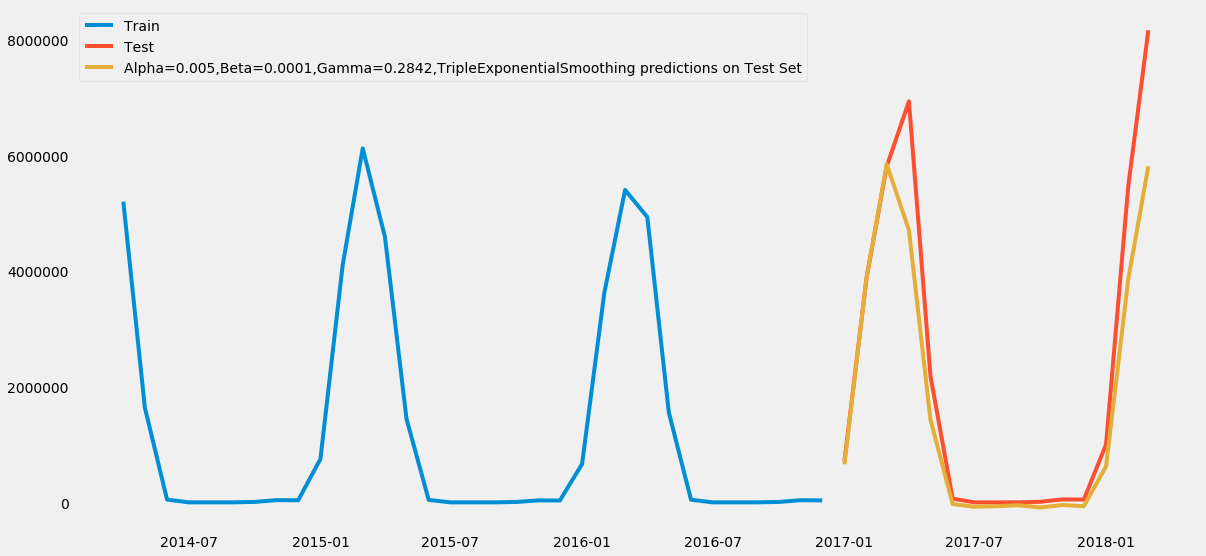

In [141]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.005,Beta=0.0001,Gamma=0.2842,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [142]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.005,Beta=0.0001,Gamma=0.2842', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.005,Beta=0.0001,Gamma=0.2842', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 961805.252


In [143]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: inf


In [144]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.0005,Beta=0.0001,Gamma=0.2842,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
"Alpha=0.0005,Beta=0.0001,Gamma=0.2842,TripleExponentialSmoothing",9.618053e+05,inf


In [145]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [146]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [147]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,2.046996e+05,9.444415e+05
1,0.1,0.1,0.2,2.029151e+05,9.435116e+05
2,0.1,0.1,0.3,2.025549e+05,9.471092e+05
3,0.1,0.1,0.4,2.034203e+05,9.544638e+05
4,0.1,0.1,0.5,2.053867e+05,9.648657e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,8.118944e+05,1.226849e+06
996,1.0,1.0,0.7,1.054123e+06,2.099265e+06
997,1.0,1.0,0.8,1.349558e+06,3.250324e+06
998,1.0,1.0,0.9,1.696563e+06,4.651375e+06


In [148]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
846,0.9,0.5,0.7,386579.296754,657811.016109
845,0.9,0.5,0.6,346635.448179,660944.587748
936,1.0,0.4,0.7,407549.241284,663141.545422
747,0.8,0.5,0.8,385240.240472,665424.388126
576,0.6,0.8,0.7,366322.339029,665987.361625


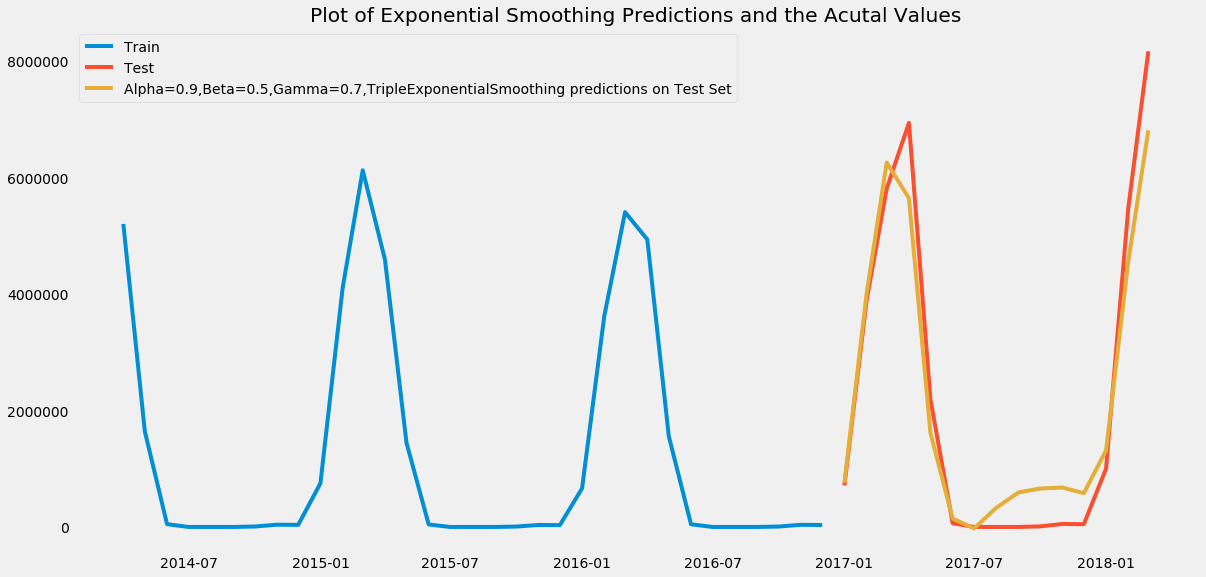

In [152]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.9000000000000000, 0.5000000000000000, 0.6], label='Alpha=0.9,Beta=0.5,Gamma=0.7,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [154]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.9,0.5,0.6])
print('\nMAPE:',mape)


MAPE: inf


In [155]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.9,Beta=0.5,Gamma=0.7,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
"Alpha=0.0005,Beta=0.0001,Gamma=0.2842,TripleExponentialSmoothing",9.618053e+05,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",6.578110e+05,inf


In [156]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",6.578110e+05,inf
"Alpha=0.0005,Beta=0.0001,Gamma=0.2842,TripleExponentialSmoothing",9.618053e+05,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
Simple Average,3.037256e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf


In [157]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

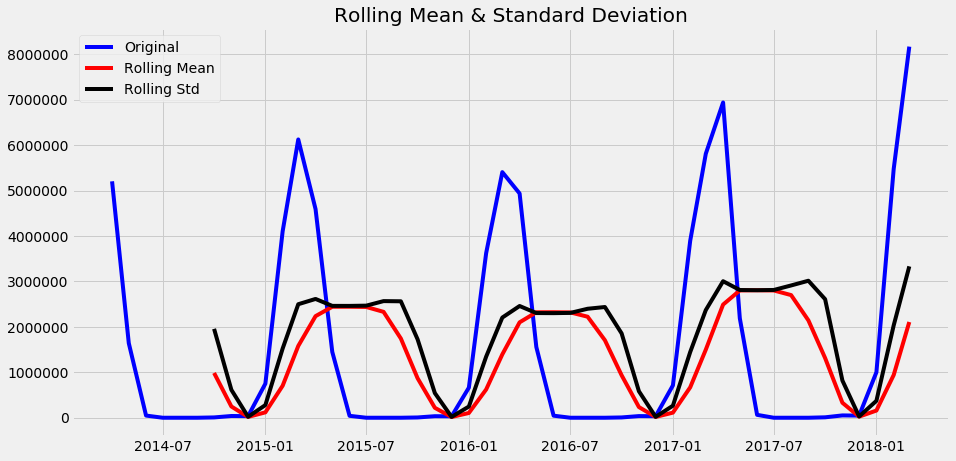

Results of Dickey-Fuller Test:
Test Statistic                 -0.820511
p-value                         0.813023
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [302]:
test_stationarity(Ban_Coo['sales'])

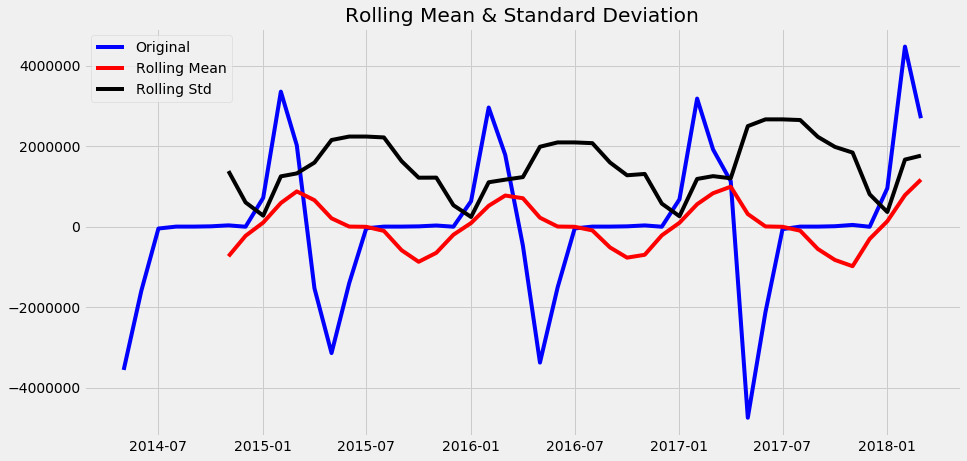

Results of Dickey-Fuller Test:
Test Statistic                -8.182997e+00
p-value                        8.037273e-13
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [303]:
test_stationarity(Ban_Coo['sales'].diff().dropna())

In [316]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [317]:
test.dropna(inplace=True)

In [318]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [91]:
from statsmodels.tsa.stattools import adfuller

In [158]:
dftest = adfuller(Ban_Coo['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.038
DF test p-value is 0.5808523311663849
Number of lags used 10


In [95]:
dftest = adfuller(train['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.896
DF test p-value is 0.0003172426490993805
Number of lags used 10


In [304]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [305]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [306]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1002.7638183544711
ARIMA(0, 1, 1) - AIC:1008.1041642739964
ARIMA(0, 1, 2) - AIC:1000.286621836012
ARIMA(0, 1, 3) - AIC:1004.5477103095823
ARIMA(1, 1, 0) - AIC:1007.4624920155728
ARIMA(1, 1, 1) - AIC:1009.2591656781858
ARIMA(1, 1, 2) - AIC:997.0065095431714
ARIMA(1, 1, 3) - AIC:1028.8766966040862
ARIMA(2, 1, 0) - AIC:1011.9757449569215
ARIMA(2, 1, 1) - AIC:1000.9499366632458
ARIMA(2, 1, 2) - AIC:1000.1877775930269
ARIMA(2, 1, 3) - AIC:1015.2035492413544
ARIMA(3, 1, 0) - AIC:1013.8477883607616
ARIMA(3, 1, 1) - AIC:1002.8391320571501
ARIMA(3, 1, 2) - AIC:1003.3209455948011
ARIMA(3, 1, 3) - AIC:1017.2492893080074


In [307]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
6,"(1, 1, 2)",997.006510
10,"(2, 1, 2)",1000.187778
2,"(0, 1, 2)",1000.286622
9,"(2, 1, 1)",1000.949937
0,"(0, 1, 0)",1002.763818


In [308]:
auto_ARIMA = ARIMA(train['sales'], order=(1,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -494.503
Date:                Fri, 20 Aug 2021   AIC                            997.007
Time:                        11:28:47   BIC                           1002.869
Sample:                    04-01-2014   HQIC                           998.950
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4496      0.243      1.848      0.065      -0.027       0.926
ma.L1         -0.4351      0.450     -0.967      0.333      -1.317       0.447
ma.L2         -0.5638      0.274     -2.060      0.0

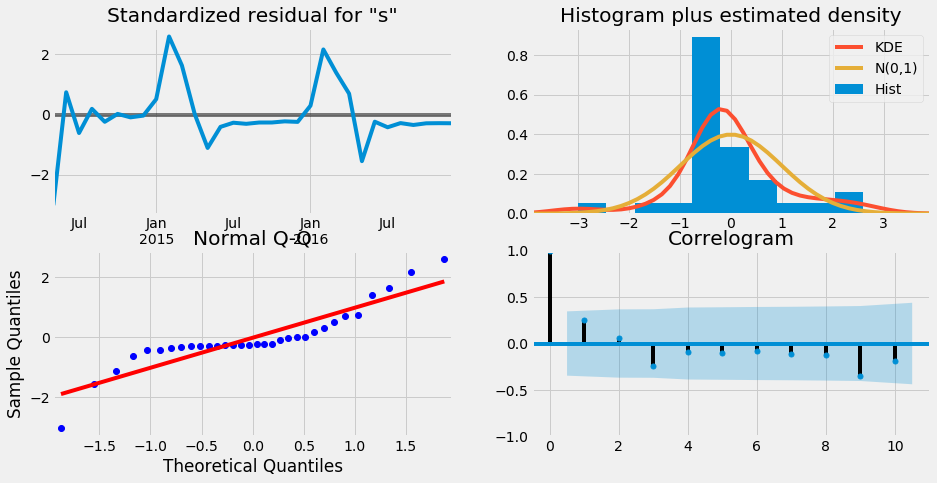

In [309]:
results_auto_ARIMA.plot_diagnostics();

In [310]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [311]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [312]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3166329.363529802 
MAPE: inf


In [313]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(2,0,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
"ARIMA(2,0,2)",inf,inf


In [315]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [316]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [317]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC:802.5198338889987
SARIMA(0, 1, 0)x(0, 1, 1, 6)6 - AIC:597.9905213851299
SARIMA(0, 1, 0)x(0, 1, 2, 6)6 - AIC:411.54611713447656
SARIMA(0, 1, 0)x(0, 1, 3, 6)6 - AIC:224.68006572299245
SARIMA(0, 1, 0)x(1, 1, 0, 6)6 - AIC:560.728223543038
SARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:897.661005498094
SARIMA(0, 1, 0)x(1, 1, 2, 6)6 - AIC:410.8883611723786
SARIMA(0, 1, 0)x(1, 1, 3, 6)6 - AIC:226.6812044040144
SARIMA(0, 1, 0)x(2, 1, 0, 6)6 - AIC:399.4170104334503
SARIMA(0, 1, 0)x(2, 1, 1, 6)6 - AIC:389.7441465954082
SARIMA(0, 1, 0)x(2, 1, 2, 6)6 - AIC:412.8633032847812
SARIMA(0, 1, 0)x(2, 1, 3, 6)6 - AIC:228.67781935128008
SARIMA(0, 1, 0)x(3, 1, 0, 6)6 - AIC:7.559419905200829
SARIMA(0, 1, 0)x(3, 1, 1, 6)6 - AIC:9.629869037745367
SARIMA(0, 1, 0)x(3, 1, 2, 6)6 - AIC:259.9125234445068
SARIMA(0, 1, 0)x(3, 1, 3, 6)6 - AIC:230.67782409064932
SARIMA(0, 1, 1)x(0, 1, 0, 6)6 - AIC:759.5420495011574
SARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:560.5369886230775
SARIMA(0, 1, 1)x(0, 1, 2, 

SARIMA(2, 1, 1)x(1, 1, 3, 6)6 - AIC:197.69688438665005
SARIMA(2, 1, 1)x(2, 1, 0, 6)6 - AIC:375.7153247846983
SARIMA(2, 1, 1)x(2, 1, 1, 6)6 - AIC:377.4223052708233
SARIMA(2, 1, 1)x(2, 1, 2, 6)6 - AIC:379.40604471142206
SARIMA(2, 1, 1)x(2, 1, 3, 6)6 - AIC:199.6969069388819
SARIMA(2, 1, 1)x(3, 1, 0, 6)6 - AIC:195.69688305749355
SARIMA(2, 1, 1)x(3, 1, 1, 6)6 - AIC:197.69691809810627
SARIMA(2, 1, 1)x(3, 1, 2, 6)6 - AIC:199.6968859982393
SARIMA(2, 1, 1)x(3, 1, 3, 6)6 - AIC:201.6968820616871
SARIMA(2, 1, 2)x(0, 1, 0, 6)6 - AIC:726.4959092145972
SARIMA(2, 1, 2)x(0, 1, 1, 6)6 - AIC:565.2652223684219
SARIMA(2, 1, 2)x(0, 1, 2, 6)6 - AIC:363.43105355979316
SARIMA(2, 1, 2)x(0, 1, 3, 6)6 - AIC:168.81110621552222
SARIMA(2, 1, 2)x(1, 1, 0, 6)6 - AIC:578.1806395455324
SARIMA(2, 1, 2)x(1, 1, 1, 6)6 - AIC:542.1361214073248
SARIMA(2, 1, 2)x(1, 1, 2, 6)6 - AIC:357.22500435272207
SARIMA(2, 1, 2)x(1, 1, 3, 6)6 - AIC:170.0188320411177
SARIMA(2, 1, 2)x(2, 1, 0, 6)6 - AIC:387.87727184604455
SARIMA(2, 1, 2)x(2, 

In [318]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
12,"(0, 1, 0)","(3, 1, 0, 6)",7.559420
13,"(0, 1, 0)","(3, 1, 1, 6)",9.629869
51,"(0, 1, 3)","(0, 1, 3, 6)",138.139639
55,"(0, 1, 3)","(1, 1, 3, 6)",140.134558
119,"(1, 1, 3)","(1, 1, 3, 6)",140.467862


In [319]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 1, 0),
                                seasonal_order=(3,1,0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 6)   Log Likelihood                   0.220
Date:                           Fri, 20 Aug 2021   AIC                              7.559
Time:                                   11:32:37   BIC                              7.877
Sample:                               04-01-2014   HQIC                             5.416
                                    - 12-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0000   1.15e-06  -8.72e+05      0.000      -1.000      -1.000
ar.S.L12      -0.5631    9.3e-06  -6.05e+04

In [320]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [321]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,7.119153e+05,0.235399,7.119148e+05,7.119157e+05
2017-02-01,3.893630e+06,0.332904,3.893629e+06,3.893631e+06
2017-03-01,5.810061e+06,0.407722,5.810060e+06,5.810062e+06
2017-04-01,4.741740e+06,0.470797,4.741739e+06,4.741741e+06
2017-05-01,1.495791e+06,0.526367,1.495790e+06,1.495792e+06


In [322]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1005998782635.5253 
MAPE: inf


In [323]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,1)(3,1,0)6'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
"ARIMA(2,0,2)",inf,inf
"SARIMA(0,1,1)(3,1,0)6",1.005999e+12,inf


In [324]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
Simple Average,3.037256e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"SARIMA(0,1,1)(3,1,0)6",1.005999e+12,inf
"ARIMA(2,0,2)",inf,inf


In [325]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [326]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [327]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:534.1872071917065
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:192.43237295422162
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:10.089319093638203
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:194.3018328078669
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:14.0
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:503.6103725142224
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:167.33434905247452
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0
SARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:221.14866648293096
SARIMA(0,

SARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:115.81690093509945
SARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:16.0
SARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:165.8753589559761
SARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:117.83295356053343
SARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:16.0
SARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 0, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(3, 1, 1, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:24.0
SARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:479.03298928293486
SARIMA(3, 1, 0)x(0, 1, 1, 12)12 - AIC:196.9548593229223
SARIMA(3, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0
SARIMA(3, 1, 0)x(0, 1, 3, 12)12 - AIC:14.0
SARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:143.53911449499324
SARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:145.53914425539782
S

In [328]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
2,"(0, 1, 0)","(0, 1, 2, 12)",6.0
8,"(0, 1, 0)","(2, 1, 0, 12)",6.0
9,"(0, 1, 0)","(2, 1, 1, 12)",8.0
3,"(0, 1, 0)","(0, 1, 3, 12)",8.0
72,"(1, 1, 0)","(2, 1, 0, 12)",8.0


In [329]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Fri, 20 Aug 2021   AIC                              6.000
Time:                                         11:38:28   BIC                                nan
Sample:                                     04-01-2014   HQIC                               nan
                                          - 12-01-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0        

In [330]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [331]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,664593.0,270474.301557,1.344731e+05,1.194713e+06
2017-02-01,3624342.0,382508.425535,2.874639e+06,4.374045e+06
2017-03-01,5407076.0,468475.232438,4.488881e+06,6.325271e+06
2017-04-01,4937971.0,540948.603114,3.877731e+06,5.998211e+06
2017-05-01,1559297.0,604798.924448,3.739129e+05,2.744681e+06


In [332]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1050640225440.0667 
MAPE: inf


In [333]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(0,1,2)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
"ARIMA(2,0,2)",inf,inf
"SARIMA(0,1,1)(3,1,0)6",1.005999e+12,inf
"SARIMA(0,1,0)(0,1,2)12",1.050640e+12,inf


In [334]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [335]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [336]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC:802.5198338889987
SARIMA(0, 1, 0)x(0, 1, 1, 6)6 - AIC:597.9905213851299
SARIMA(0, 1, 0)x(0, 1, 2, 6)6 - AIC:411.54611713447656
SARIMA(0, 1, 0)x(0, 1, 3, 6)6 - AIC:224.68006572299245
SARIMA(0, 1, 0)x(1, 1, 0, 6)6 - AIC:560.728223543038
SARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:897.661005498094
SARIMA(0, 1, 0)x(1, 1, 2, 6)6 - AIC:410.8883611723786
SARIMA(0, 1, 0)x(1, 1, 3, 6)6 - AIC:226.6812044040144
SARIMA(0, 1, 0)x(2, 1, 0, 6)6 - AIC:399.4170104334503
SARIMA(0, 1, 0)x(2, 1, 1, 6)6 - AIC:389.7441465954082
SARIMA(0, 1, 0)x(2, 1, 2, 6)6 - AIC:412.8633032847812
SARIMA(0, 1, 0)x(2, 1, 3, 6)6 - AIC:228.67781935128008
SARIMA(0, 1, 0)x(3, 1, 0, 6)6 - AIC:7.559419905200829
SARIMA(0, 1, 0)x(3, 1, 1, 6)6 - AIC:9.629869037745367
SARIMA(0, 1, 0)x(3, 1, 2, 6)6 - AIC:259.9125234445068
SARIMA(0, 1, 0)x(3, 1, 3, 6)6 - AIC:230.67782409064932
SARIMA(0, 1, 1)x(0, 1, 0, 6)6 - AIC:759.5420495011574
SARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:560.5369886230775
SARIMA(0, 1, 1)x(0, 1, 2, 

SARIMA(2, 1, 1)x(1, 1, 3, 6)6 - AIC:197.69688438665005
SARIMA(2, 1, 1)x(2, 1, 0, 6)6 - AIC:375.7153247846983
SARIMA(2, 1, 1)x(2, 1, 1, 6)6 - AIC:377.4223052708233
SARIMA(2, 1, 1)x(2, 1, 2, 6)6 - AIC:379.40604471142206
SARIMA(2, 1, 1)x(2, 1, 3, 6)6 - AIC:199.6969069388819
SARIMA(2, 1, 1)x(3, 1, 0, 6)6 - AIC:195.69688305749355
SARIMA(2, 1, 1)x(3, 1, 1, 6)6 - AIC:197.69691809810627
SARIMA(2, 1, 1)x(3, 1, 2, 6)6 - AIC:199.6968859982393
SARIMA(2, 1, 1)x(3, 1, 3, 6)6 - AIC:201.6968820616871
SARIMA(2, 1, 2)x(0, 1, 0, 6)6 - AIC:726.4959092145972
SARIMA(2, 1, 2)x(0, 1, 1, 6)6 - AIC:565.2652223684219
SARIMA(2, 1, 2)x(0, 1, 2, 6)6 - AIC:363.43105355979316
SARIMA(2, 1, 2)x(0, 1, 3, 6)6 - AIC:168.81110621552222
SARIMA(2, 1, 2)x(1, 1, 0, 6)6 - AIC:578.1806395455324
SARIMA(2, 1, 2)x(1, 1, 1, 6)6 - AIC:542.1361214073248
SARIMA(2, 1, 2)x(1, 1, 2, 6)6 - AIC:357.22500435272207
SARIMA(2, 1, 2)x(1, 1, 3, 6)6 - AIC:170.0188320411177
SARIMA(2, 1, 2)x(2, 1, 0, 6)6 - AIC:387.87727184604455
SARIMA(2, 1, 2)x(2, 

In [337]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
12,"(0, 1, 0)","(3, 1, 0, 6)",7.559420
13,"(0, 1, 0)","(3, 1, 1, 6)",9.629869
51,"(0, 1, 3)","(0, 1, 3, 6)",138.139639
55,"(0, 1, 3)","(1, 1, 3, 6)",140.134558
119,"(1, 1, 3)","(1, 1, 3, 6)",140.467862


In [338]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 1, 0),
                                seasonal_order=(3, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 6)   Log Likelihood                   0.220
Date:                           Fri, 20 Aug 2021   AIC                              7.559
Time:                                   11:49:37   BIC                              7.877
Sample:                               04-01-2014   HQIC                             5.416
                                    - 12-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0000   1.15e-06  -8.72e+05      0.000      -1.000      -1.000
ar.S.L12      -0.5631    9.3e-06  -6.05e+04

In [339]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [340]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,7.119153e+05,0.235399,7.119148e+05,7.119157e+05
2017-02-01,3.893630e+06,0.332904,3.893629e+06,3.893631e+06
2017-03-01,5.810061e+06,0.407722,5.810060e+06,5.810062e+06
2017-04-01,4.741740e+06,0.470797,4.741739e+06,4.741741e+06
2017-05-01,1.495791e+06,0.526367,1.495790e+06,1.495792e+06


In [341]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1005998782635.5253 
MAPE: inf


In [342]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(3,1,0)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
"ARIMA(2,0,2)",inf,inf
"SARIMA(0,1,1)(3,1,0)6",1.005999e+12,inf
"SARIMA(0,1,0)(0,1,2)12",1.050640e+12,inf
"SARIMA(0,1,0)(3,1,0)12",1.005999e+12,inf


In [343]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
Simple Average,3.037256e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"SARIMA(0,1,1)(3,1,0)6",1.005999e+12,inf
"SARIMA(0,1,0)(3,1,0)12",1.005999e+12,inf
"SARIMA(0,1,0)(0,1,2)12",1.050640e+12,inf
"ARIMA(2,0,2)",inf,inf


In [344]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [345]:
Ban_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Bangalore,5202792
2014-05-01,coolers,Bangalore,1641231
2014-06-01,coolers,Bangalore,47700
2014-07-01,coolers,Bangalore,0
2014-08-01,coolers,Bangalore,0


In [346]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Ban_Coo1['date'])
df_prophet['y'] = Ban_Coo1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,51152
2017-12-01,2017-12-01,47221
2018-01-01,2018-01-01,1000729
2018-02-01,2018-02-01,5473220
2018-03-01,2018-03-01,8167119


In [347]:
df_prophet.shape

(48, 2)

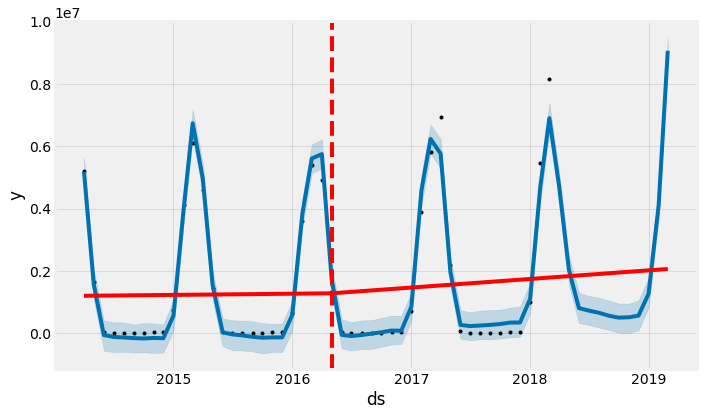

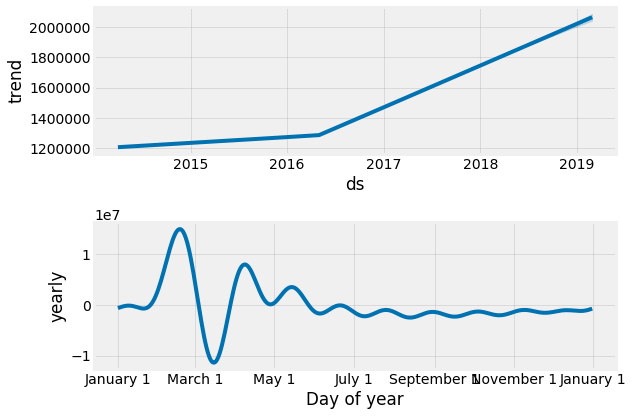

In [348]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [349]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,1.205803e+06,4.688839e+06,5.659697e+06,1.205803e+06,1.205803e+06,3.977785e+06,3.977785e+06,3.977785e+06,3.977785e+06,3.977785e+06,3.977785e+06,0.0,0.0,0.0,5.183588e+06
1,2014-05-01,1.208926e+06,1.095225e+06,2.050902e+06,1.208926e+06,1.208926e+06,3.585144e+05,3.585144e+05,3.585144e+05,3.585144e+05,3.585144e+05,3.585144e+05,0.0,0.0,0.0,1.567441e+06
2,2014-06-01,1.212154e+06,-5.597756e+05,4.181661e+05,1.212154e+06,1.212154e+06,-1.266837e+06,-1.266837e+06,-1.266837e+06,-1.266837e+06,-1.266837e+06,-1.266837e+06,0.0,0.0,0.0,-5.468275e+04
3,2014-07-01,1.215277e+06,-6.005764e+05,3.553268e+05,1.215277e+06,1.215277e+06,-1.329887e+06,-1.329887e+06,-1.329887e+06,-1.329887e+06,-1.329887e+06,-1.329887e+06,0.0,0.0,0.0,-1.146095e+05
4,2014-08-01,1.218505e+06,-5.903891e+05,3.509339e+05,1.218505e+06,1.218505e+06,-1.350313e+06,-1.350313e+06,-1.350313e+06,-1.350313e+06,-1.350313e+06,-1.350313e+06,0.0,0.0,0.0,-1.318081e+05
5,2014-09-01,1.221732e+06,-6.112687e+05,2.835469e+05,1.221732e+06,1.221732e+06,-1.374784e+06,-1.374784e+06,-1.374784e+06,-1.374784e+06,-1.374784e+06,-1.374784e+06,0.0,0.0,0.0,-1.530520e+05
6,2014-10-01,1.224856e+06,-6.071618e+05,3.328449e+05,1.224856e+06,1.224856e+06,-1.389684e+06,-1.389684e+06,-1.389684e+06,-1.389684e+06,-1.389684e+06,-1.389684e+06,0.0,0.0,0.0,-1.648283e+05
7,2014-11-01,1.228083e+06,-6.283245e+05,3.183810e+05,1.228083e+06,1.228083e+06,-1.374787e+06,-1.374787e+06,-1.374787e+06,-1.374787e+06,-1.374787e+06,-1.374787e+06,0.0,0.0,0.0,-1.467036e+05
8,2014-12-01,1.231206e+06,-6.158726e+05,2.875871e+05,1.231206e+06,1.231206e+06,-1.386691e+06,-1.386691e+06,-1.386691e+06,-1.386691e+06,-1.386691e+06,-1.386691e+06,0.0,0.0,0.0,-1.554845e+05
9,2015-01-01,1.234434e+06,9.135915e+04,1.076294e+06,1.234434e+06,1.234434e+06,-6.612445e+05,-6.612445e+05,-6.612445e+05,-6.612445e+05,-6.612445e+05,-6.612445e+05,0.0,0.0,0.0,5.731894e+05


In [350]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

812728930489.6998


In [351]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.037256e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.630658e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.110571e+06,inf
"Alpha=0.6,Beta=0.9,DoubleExponentialSmoothing",2.909295e+06,inf
"ARIMA(2,0,2)",inf,inf
"SARIMA(0,1,1)(3,1,0)6",1.005999e+12,inf
"SARIMA(0,1,0)(0,1,2)12",1.050640e+12,inf
"SARIMA(0,1,0)(3,1,0)12",1.005999e+12,inf
Prophet,8.127289e+11,NaN


In [352]:
import fbprophet

In [353]:
m = fbprophet.Prophet()

In [354]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [355]:
future = m.make_future_dataframe(periods=365)

In [356]:
forecast = m.predict(future)

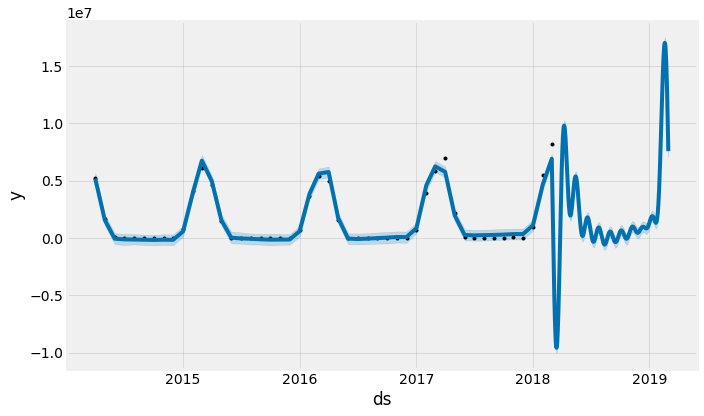

In [357]:
m.plot(forecast);

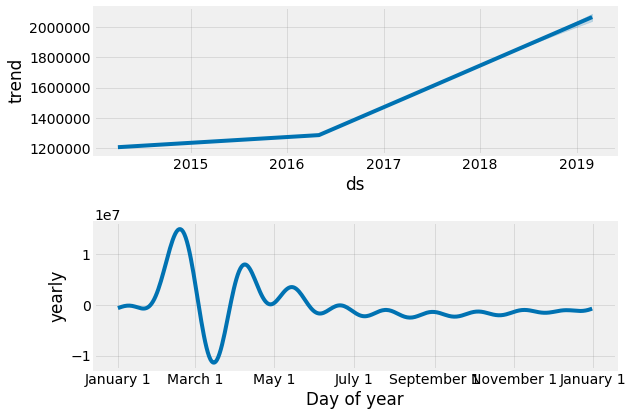

In [358]:
m.plot_components(forecast);

In [359]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,5202792
2014-05-01,2014-05-01,1641231
2014-06-01,2014-06-01,47700
2014-07-01,2014-07-01,0
2014-08-01,2014-08-01,0


In [360]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [361]:
predict=m.predict(future)

In [362]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,1.205803e+06,4.706912e+06,5.651393e+06,1.205803e+06,1.205803e+06,3.977785e+06,3.977785e+06,3.977785e+06,3.977785e+06,3.977785e+06,3.977785e+06,0.0,0.0,0.0,5.183588e+06
1,2014-05-01,1.208926e+06,1.108383e+06,2.026847e+06,1.208926e+06,1.208926e+06,3.585144e+05,3.585144e+05,3.585144e+05,3.585144e+05,3.585144e+05,3.585144e+05,0.0,0.0,0.0,1.567441e+06
2,2014-06-01,1.212154e+06,-5.439372e+05,4.158500e+05,1.212154e+06,1.212154e+06,-1.266837e+06,-1.266837e+06,-1.266837e+06,-1.266837e+06,-1.266837e+06,-1.266837e+06,0.0,0.0,0.0,-5.468275e+04
3,2014-07-01,1.215277e+06,-5.815738e+05,3.497034e+05,1.215277e+06,1.215277e+06,-1.329887e+06,-1.329887e+06,-1.329887e+06,-1.329887e+06,-1.329887e+06,-1.329887e+06,0.0,0.0,0.0,-1.146095e+05
4,2014-08-01,1.218505e+06,-5.986401e+05,3.247701e+05,1.218505e+06,1.218505e+06,-1.350313e+06,-1.350313e+06,-1.350313e+06,-1.350313e+06,-1.350313e+06,-1.350313e+06,0.0,0.0,0.0,-1.318081e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,2.064418e+06,1.252926e+07,1.346055e+07,2.041083e+06,2.086023e+06,1.092865e+07,1.092865e+07,1.092865e+07,1.092865e+07,1.092865e+07,1.092865e+07,0.0,0.0,0.0,1.299307e+07
409,2019-02-26,2.065175e+06,1.135147e+07,1.225740e+07,2.041806e+06,2.086875e+06,9.736310e+06,9.736310e+06,9.736310e+06,9.736310e+06,9.736310e+06,9.736310e+06,0.0,0.0,0.0,1.180148e+07
410,2019-02-27,2.065932e+06,1.001399e+07,1.096336e+07,2.042505e+06,2.087728e+06,8.422116e+06,8.422116e+06,8.422116e+06,8.422116e+06,8.422116e+06,8.422116e+06,0.0,0.0,0.0,1.048805e+07
411,2019-02-28,2.066689e+06,8.578687e+06,9.562514e+06,2.043218e+06,2.088581e+06,7.003996e+06,7.003996e+06,7.003996e+06,7.003996e+06,7.003996e+06,7.003996e+06,0.0,0.0,0.0,9.070685e+06


In [363]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,5.183588e+06,4.706912e+06,5.651393e+06
1,2014-05-01,1.567441e+06,1.108383e+06,2.026847e+06
2,2014-06-01,-5.468275e+04,-5.439372e+05,4.158500e+05
3,2014-07-01,-1.146095e+05,-5.815738e+05,3.497034e+05
4,2014-08-01,-1.318081e+05,-5.986401e+05,3.247701e+05


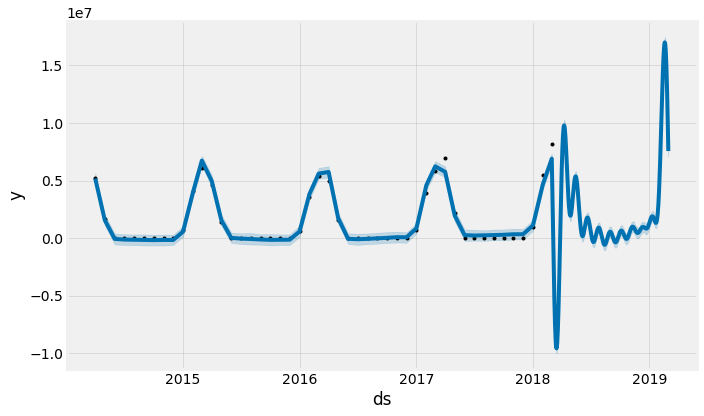

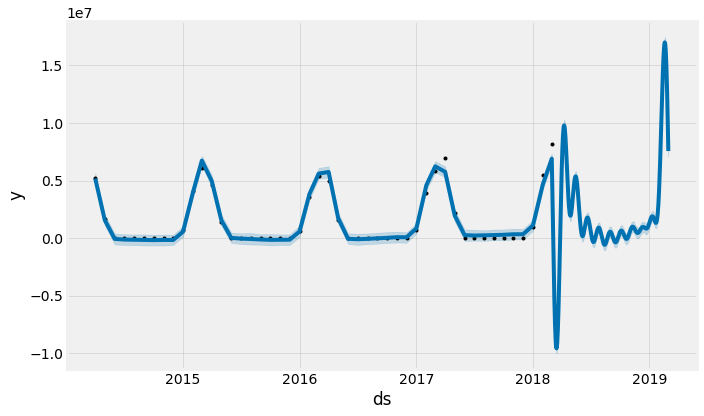

In [364]:
m.plot(predict)

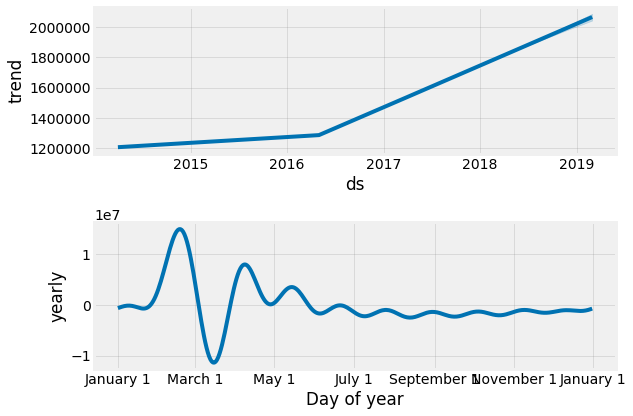

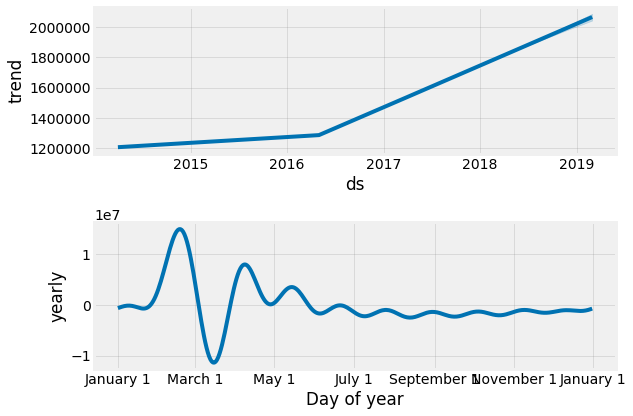

In [365]:
m.plot_components(predict)

In [366]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [367]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,1.850959e+05,1.192467e+05,2.527767e+05,6700,2016-09-02
1,2016-11-01,1.414160e+05,7.515780e+04,2.065806e+05,36389,2016-09-02
2,2016-12-01,-1.046667e+04,-7.774071e+04,6.417928e+04,33593,2016-09-02
3,2017-01-01,6.928340e+05,6.233040e+05,7.681597e+05,711915,2016-09-02
4,2017-02-01,4.662750e+06,4.589420e+06,4.735746e+06,3893629,2016-09-02


In [368]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,31 days,2.064529e+12,1.436847e+06,1.101279e+06,13.459006,0.0
1,60 days,2.054132e+12,1.433224e+06,1.064595e+06,1.588991,0.0
2,61 days,2.357830e+11,4.855750e+05,3.918273e+05,1.598153,0.0
3,90 days,2.312383e+11,4.808725e+05,3.613436e+05,0.810824,0.5
4,92 days,3.782455e+09,6.150166e+04,5.952535e+04,1.245264,1.0


model = ARIMA(Ban_Mix['sales'], order=(1,1,2))
try:
    model_fit = model.fit()
except:
    pass
output = model_fit.forecast(12)
yhat = output[0]
print(model_fit.summary())

In [369]:
fullmodel1 = ExponentialSmoothing(Ban_Coo['sales'],
                                  trend='additive',
                                  seasonal='Additive').fit(smoothing_level=0.9,
                                                                 smoothing_slope=0.5,
                                                                 smoothing_seasonal=0.7)

In [370]:
RMSE_fullmodel1 = metrics.mean_squared_error(Ban_Coo['sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 367518.4846136341


In [371]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=24)

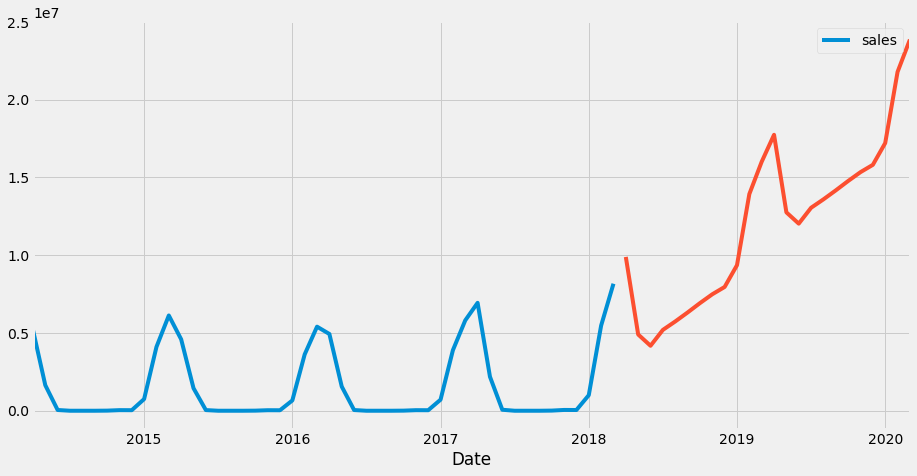

In [372]:
Ban_Coo.plot()
prediction_1.plot();

In [373]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
2018-04-01,9.164275e+06,9.889251e+06,1.061423e+07
2018-05-01,4.177680e+06,4.902656e+06,5.627632e+06
2018-06-01,3.452486e+06,4.177462e+06,4.902438e+06
2018-07-01,4.472973e+06,5.197949e+06,5.922925e+06
2018-08-01,5.013936e+06,5.738912e+06,6.463888e+06


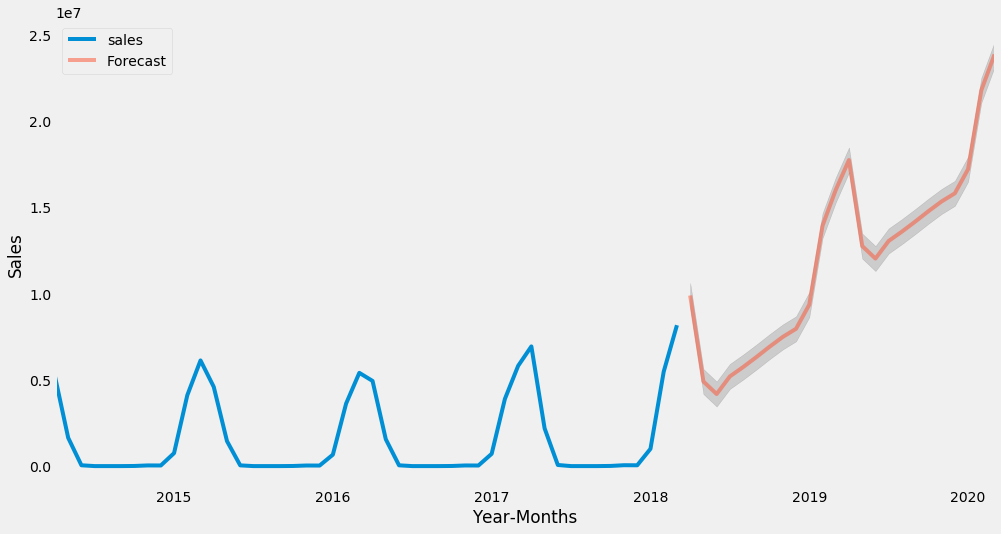

In [374]:
# plot the forecast along with the confidence band

axis = Ban_Coo.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()